In [82]:
import matplotlib.pyplot as plt
import sympy as smp
import numpy as np

In [43]:
import sys
sys.path.insert(1, r"D:\Program Files (x86)\TuringBot")

import turingbot as tb
import time

path = r'D:\Program Files (x86)\TuringBot\TuringBot.exe' 
input_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data\saida_fixed.csv' 
# D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data
# config_file = r'D:\Users\user\Desktop\settings.cfg' 

In [44]:
import pandas as pd

data = pd.read_csv("Data\saida.csv")
data.columns = ["x", "theta", "omega"]
data.drop("omega", axis=1, inplace=True)
data.to_csv("Data/saida_fixed.csv", index=False)

In [110]:
sim = tb.simulation()

sim.start_process(path, input_file)

time.sleep(900)

sim.refresh_functions()

In [111]:
print(*sim.functions, sep='\n')

[1, 0.0539885, '0.1099977679254103']
[5, 0.0107228, '0.2034927440846326-0.3666456631108881*x']
[7, 0.00304119, '0.1709542950879586-0.7100377209600361*x*x']
[9, 1.36088e-05, '0.1745514473811473*cos(-3.124212166886015*x)']
[11, 1.28224e-05, '0.174550761396655*cos(3.124318153566015*(-1.887424494966438e-05+x))']
[13, 8.39832e-06, '0.1744975652419756*cos(3.108391351604141*(1.005902041383996*x-0.0003568329676385338))']
[15, 3.27959e-06, '(0.003629697727482864*x+2.686483141581334)*0.06496403677137258*cos(3.12448727579494*x)']
[17, 1.43422e-06, '2.688401442599977*asinh(0.06496560229723425*cos(3.124316617718017*(-1.000082032159058*x)))']
[19, 1.26914e-06, '2.688413386543285*asinh(0.06496552509471881*cos(3.124292797698017*((-1.000081858346527)*(-3.667032608428909e-06-x))))']
[21, 4.39847e-07, '(2.688398865235203-0.0003593589356063638*x)*asinh(0.06496659705053662*cos(3.124284488913688*(-1.000081877966233*x)))']
[23, 3.53363e-07, '(2.688394472175203-(0.0004167398080506851*(-0.1425638405890274+x)))

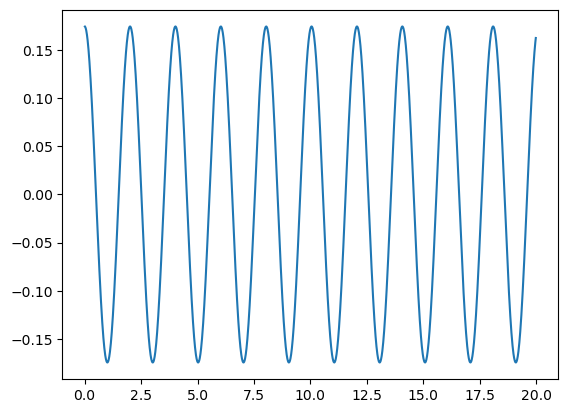

In [49]:
plt.plot(data.x, data.theta)
plt.show()

In [112]:
x = smp.symbols("x")

from sympy.parsing.sympy_parser import parse_expr

expr = parse_expr(sim.functions[3][2])
expr

0.1745514473811473*cos(3.124212166886015*x)

In [113]:
from sympy.utilities.lambdify import lambdify

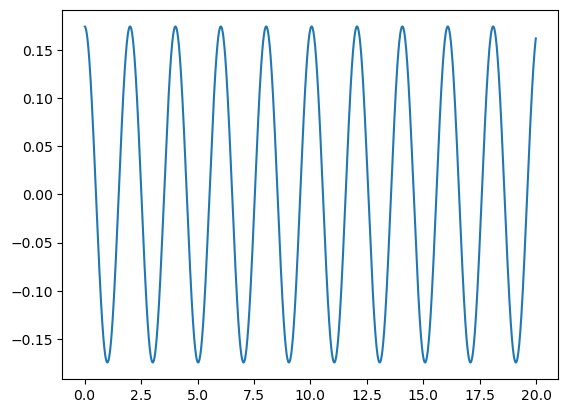

In [114]:
f = lambdify(['x'], expr)

generated_y = f(np.array(data.x))

plt.plot(data.x, generated_y)
plt.show()